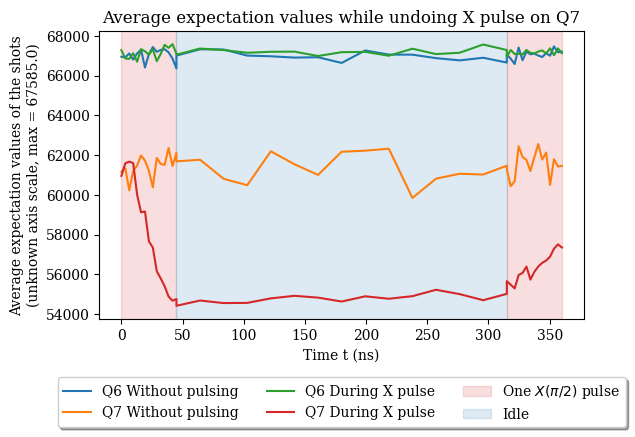

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Load data
list_q1 = np.load('x_expects_q1.npy')
list_q2 = np.load('x_expects_q2.npy')
list_base_q1 = np.load('baseline_expects_q1.npy')
list_base_q2 = np.load('baseline_expects_q2.npy')
times = np.load('x_pulse_times.npy')

finish_t, Q1, Q2, drive_qubit, amplitude = np.load('run_params.npy')

Q1=int(Q1)+1
Q2=int(Q2)+1
drive_qubit = int(drive_qubit)+1

# Set plot parameters
plt.rcParams["legend.loc"] = 'lower center'
plt.rcParams["legend.fancybox"] = True
plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = 'serif'

# Plotting
plt.figure()

# Plotting average expectation values
plt.plot(times, list_base_q1, label=f'Q{Q1} Without pulsing')
plt.plot(times, list_base_q2, label=f'Q{Q2} Without pulsing')
plt.plot(times, list_q1, label=f'Q{Q1} During X pulse')
plt.plot(times, list_q2, label=f'Q{Q2} During X pulse')

# Axes labels and title
plt.xlabel('Time t (ns)')
plt.ylabel(f'Average expectation values of the shots\n(unknown axis scale, max = {np.round(max(list_q1))})')
plt.title(f'Average expectation values while undoing X pulse on Q{drive_qubit}')

# Highlight X pulse period
plt.axvspan(0, finish_t, alpha=0.15, color='C3', label=r'One $X(\pi/2)$ pulse')
plt.axvspan(finish_t, finish_t*7, alpha=0.15, color='C0', label=r'Idle')
plt.axvspan(finish_t*7, finish_t*8, alpha=0.15, color='C3')

# Add legend
plt.legend(bbox_to_anchor=(0.5, -0.4), shadow=True, ncol=3)

# Adjust layout
plt.tight_layout()

# Save plot as image
plt.savefig('undo_expectation.png')

# Display plot
plt.show()

